In [2]:
import astropy.units as u
from specutils import Spectrum1D
from astrodb_utils.spectra import check_spectrum_plottable
import os
import numpy as np
from specutils import Spectrum, SpectralRegion
from specutils.manipulation import extract_region

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


In [3]:
path = "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/"

In [7]:
files = [ # list of files that need masking
    "DSpec_0559-2903.txt",
    "DSpec_0723+0316.txt",
    "DSpec_0822+1700.txt",
    "DSpec_1158p0447.txt",
    "DSpec_1256-1408.txt",
    "DSpec_1416+1348.txt",
    "DSpec_1434p2202.txt"
]


Processing DSpec_0559-2903.txt


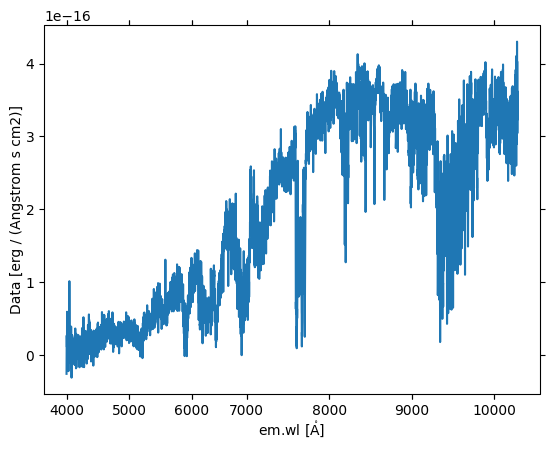

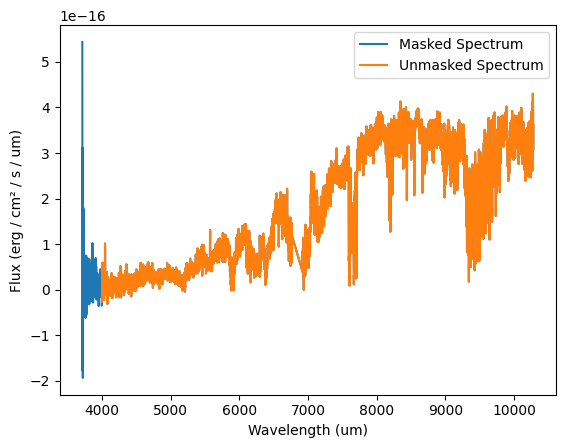

Processing DSpec_0723+0316.txt


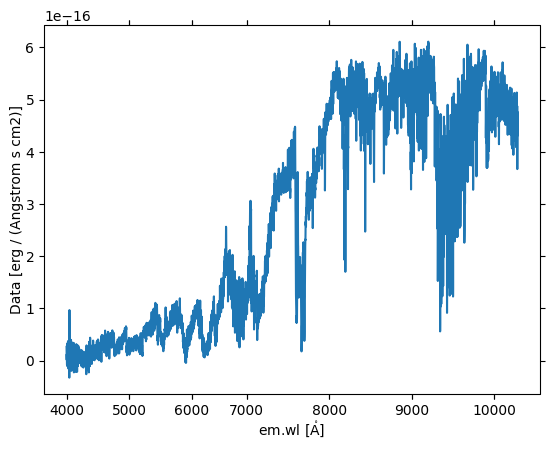

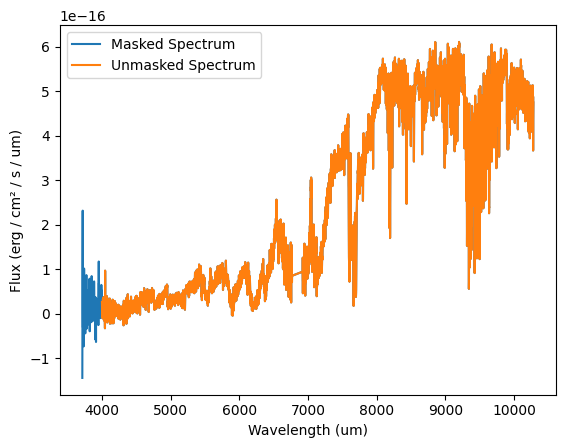

Processing DSpec_0822+1700.txt


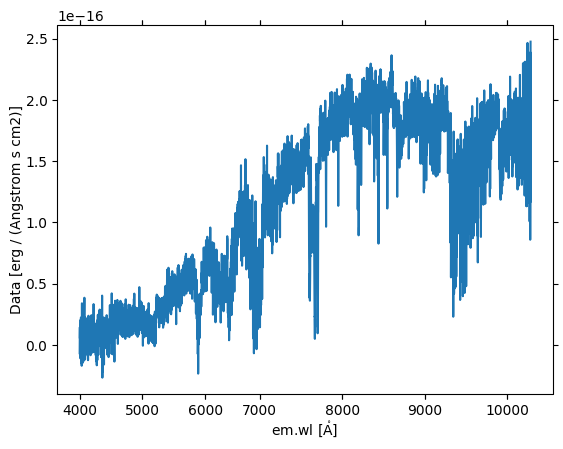

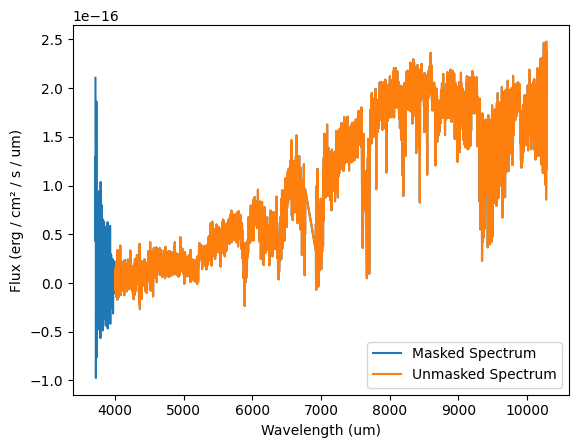

Processing DSpec_1158p0447.txt


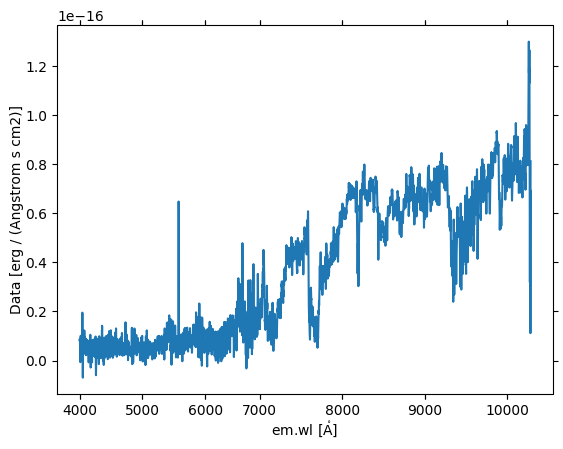

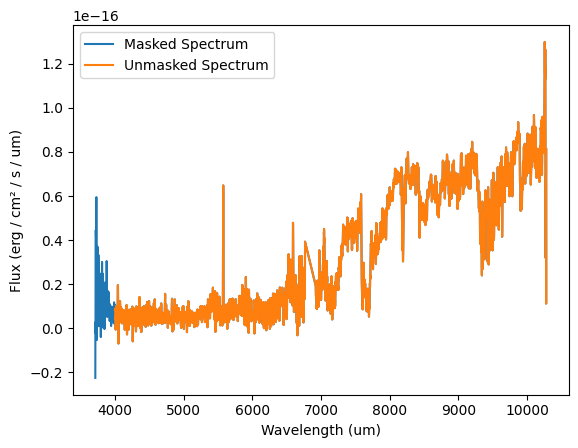

Processing DSpec_1256-1408.txt


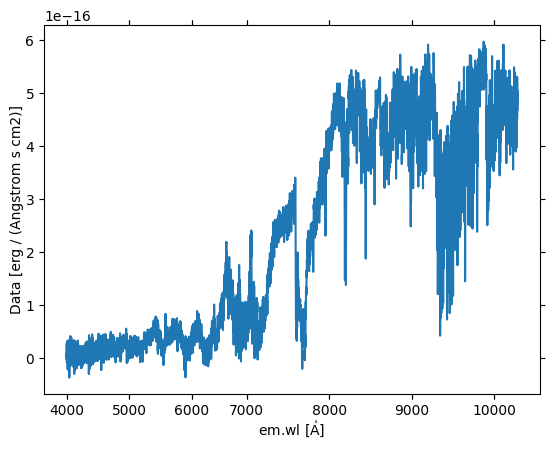

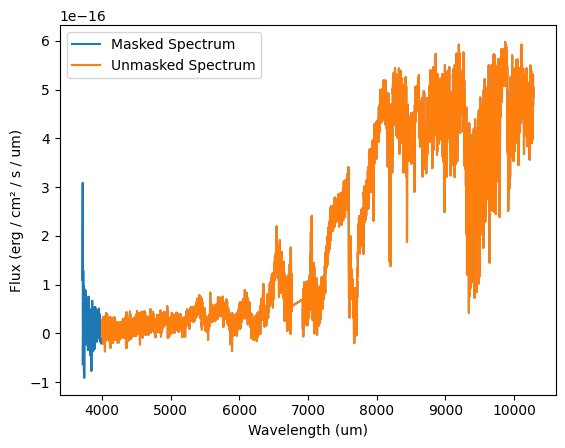

Processing DSpec_1416+1348.txt


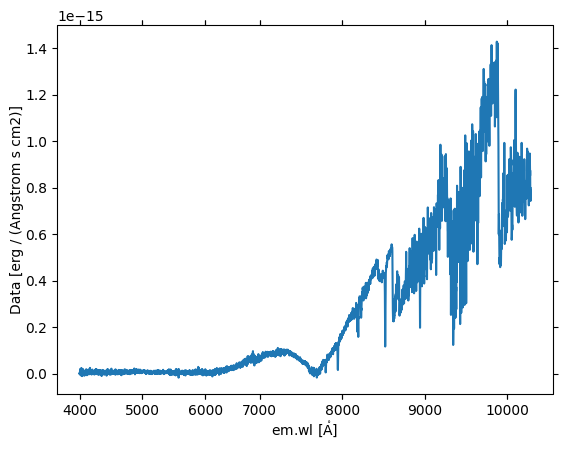

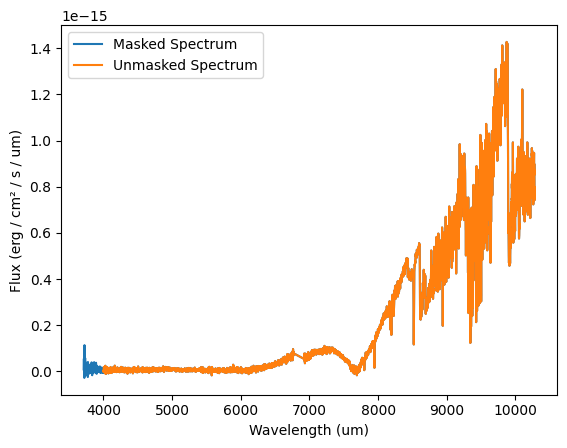

Processing DSpec_1434p2202.txt


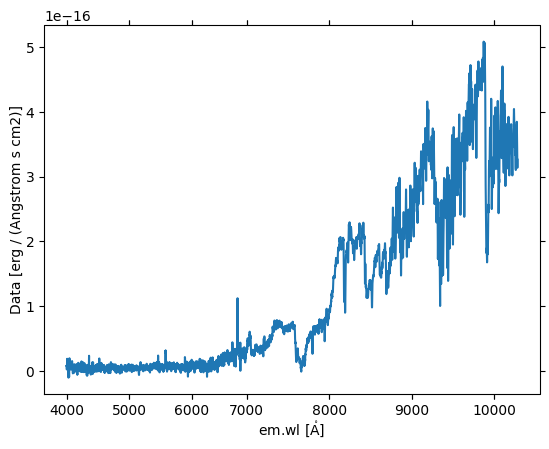

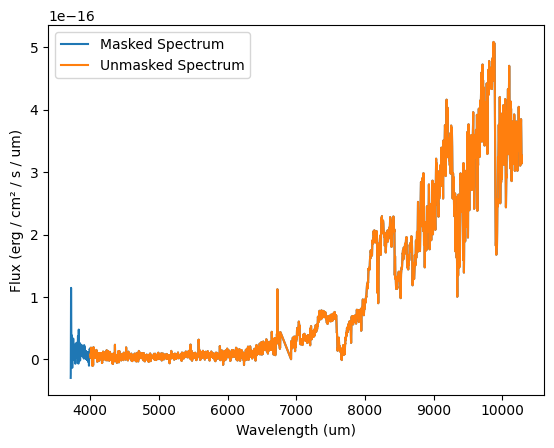

Total files plotted: 7


In [8]:
import matplotlib.pyplot as plt
file_plotted = 0
for filename in files:
    if "DSPEC" in filename.upper():
        print(f"Processing {filename}")
        file_path = os.path.join(path, filename)
        data = np.loadtxt(file_path, comments="#", encoding="latin1")

        wavelength = data[:, 0] * u.AA
        flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)

        mask = np.logical_or(wavelength.value < 4000, wavelength.value > 15000)
             
        # Create Spectrum object
        spectrum = Spectrum(
            flux=flux,
            spectral_axis=wavelength,
            mask=mask
        )
        spectrum.plot()

        # Plot using matplotlib to check masked and unmasked data
        fig, ax = plt.subplots()
        ax.plot(spectrum.spectral_axis, spectrum.flux, label='Masked Spectrum')
        ax.plot(spectrum.spectral_axis[~spectrum.mask], spectrum.flux[~spectrum.mask], label='Unmasked Spectrum')
        ax.legend()
        ax.set_xlabel("Wavelength (um)")
        ax.set_ylabel("Flux (erg / cm² / s / um)")
        plt.show()
        file_plotted += 1
print(f"Total files plotted: {file_plotted}")
